In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'your_text_data' is a list of strings or a pandas Series
# containing your text data
your_text_data = ["example text 1", "example text 2", "another example"]

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(your_text_data) # Replace 'data.data' with your text data variable

# Print the shape of the resulting matrix
print(X.shape)

(3, 2)


In [6]:
from sklearn.model_selection import train_test_split

# Assuming 'your_target_variable' is a list or a pandas Series containing your target variable (labels)
# Replace this with your actual target variable data
your_target_variable = [0, 1, 0] # Example target variable

# Now use 'your_target_variable' instead of 'data.target'
X_train, X_test, y_train, y_test = train_test_split(X, your_target_variable, test_size=0.3, random_state=42)

In [9]:
from sklearn.svm import SVC

# Train an SVM with a linear kernel
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [10]:
from sklearn.metrics import classification_report

# Predict and evaluate
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [13]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_kernels
from scipy import sparse

def jaccard_similarity(x, y):
    # Convert inputs to sparse matrices if they are numpy arrays
    x = x.reshape(1, -1) if isinstance(x, np.ndarray) else x
    y = y.reshape(1, -1) if isinstance(y, np.ndarray) else y

    # Check if inputs are already sparse, convert if necessary
    x = x if sparse.issparse(x) else sparse.csr_matrix(x)
    y = y if sparse.issparse(y) else sparse.csr_matrix(y)

    intersection = (x.minimum(y)).sum()
    union = (x.maximum(y)).sum()
    return intersection / union

custom_svm = SVC(kernel=lambda X, Y: pairwise_kernels(X, Y, metric=jaccard_similarity))
custom_svm.fit(X_train.toarray(), y_train) # Fitting the model

SVC(kernel=<function <lambda> at 0x7bc019bad5a0>)

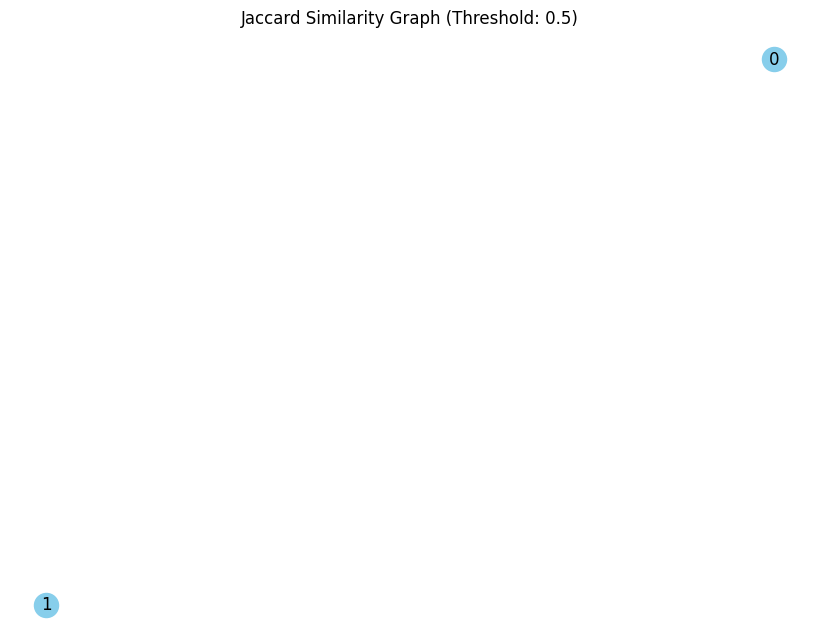

In [14]:
!pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import pairwise_kernels
from scipy import sparse

# Your existing jaccard_similarity function (modified as before)
def jaccard_similarity(x, y):
    x = x.reshape(1, -1) if isinstance(x, np.ndarray) else x
    y = y.reshape(1, -1) if isinstance(y, np.ndarray) else y
    x = x if sparse.issparse(x) else sparse.csr_matrix(x)
    y = y if sparse.issparse(y) else sparse.csr_matrix(y)
    intersection = (x.minimum(y)).sum()
    union = (x.maximum(y)).sum()
    return intersection / union

# Assuming X_train is your data (sparse or dense)
X_train_dense = X_train.toarray()  # Convert to dense if sparse

# Calculate Jaccard similarity matrix
similarity_matrix = pairwise_kernels(X_train_dense, metric=jaccard_similarity)

# Create a graph using NetworkX
graph = nx.Graph()
num_nodes = similarity_matrix.shape[0]  # Number of data points

# Add nodes to the graph
graph.add_nodes_from(range(num_nodes))

# Add edges based on similarity (threshold for visualization)
threshold = 0.5  # Adjust as needed
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        if similarity_matrix[i, j] >= threshold:
            graph.add_edge(i, j, weight=similarity_matrix[i, j])

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(graph)  # Layout algorithm
nx.draw(graph, pos, with_labels=True, node_color='skyblue', edge_color='gray', width=[graph[u][v]['weight'] * 2 for u, v in graph.edges()])  # Edge thickness based on weight
plt.title("Jaccard Similarity Graph (Threshold: {})".format(threshold))
plt.show()

In [16]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC

models = {
    'Linear': SVC(kernel='linear'),
    'RBF': SVC(kernel='rbf', gamma=0.1),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Kernel Classification Report:\n")
    print(classification_report(y_test, y_pred))


Linear Kernel Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

RBF Kernel Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_